In [1]:
# Packages
import tsplib95
import matplotlib.pyplot as plt

URV                                                                            MESIIA

Neural and Evolutionary Computation (NEC)
Assignment 4: Optimization with Genetic Algorithm

Teachers: Dr. Jordi Duch, Dr. Sergio Gomez

Student: Natzaret Gálvez Rísquez

Implementing a genetic algorithm for the Traveling Salesman Problem (TSP) using the TSPLIB library 

In [2]:
# Dataset 1
# File path
tsp_file_path = 'C:/Users/NAZA/Desktop/Assignments_NEC/A4/burma14.tsp'

# Load the dataset
dataset1 = tsplib95.load(tsp_file_path)

In [3]:
# Dataset 2
# File path
tsp_file_path = 'C:/Users/NAZA/Desktop/Assignments_NEC/A4/bays29.tsp'

# Load the dataset
dataset2 = tsplib95.load(tsp_file_path)

In [4]:
# Dataset 3
# File path
tsp_file_path = 'C:/Users/NAZA/Desktop/Assignments_NEC/A4/eil101.tsp'

# Load the dataset
dataset3 = tsplib95.load(tsp_file_path)

In [5]:
# Dataset 4 
# File path
tsp_file_path = 'C:/Users/NAZA/Desktop/Assignments_NEC/A4/pcb1173.tsp'

# Load the dataset
dataset4 = tsplib95.load(tsp_file_path)

In [6]:
# Dataset 5 
# File path
tsp_file_path = 'C:/Users/NAZA/Desktop/Assignments_NEC/A4/fl3795.tsp'

# Load the dataset
dataset5 = tsplib95.load(tsp_file_path)

Genetic algorithm  for solving the Traveling Salesman Problem (TSP) using permutation representation and various selection, mutation, and crossover techniques

In [7]:
import numpy as np
from scipy.spatial.distance import euclidean

def euclidean_distance(coord1, coord2):
    return np.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)

def compute_distances(node_coords):
    num_cities = len(node_coords)
    distances = np.zeros((num_cities, num_cities))
    
    # Function to calculate Euclidean distance between two points
    def euclidean_distance(coord1, coord2):
        return euclidean(coord1, coord2)
    
    for i in range(1, num_cities + 1):
        for j in range(1, num_cities + 1):
            distances[i - 1, j - 1] = euclidean_distance(node_coords[i], node_coords[j])
    
    return distances

def parse_dataset(dataset):
    node_coords = {}
    for node in dataset.node_coords:
        node_coords[node] = dataset.node_coords[node]
    return node_coords

def total_distance(solution, distances):
    solution = np.array(solution, dtype=int)  # Convert solution to a NumPy array of integers
    n = len(solution)
    distance = 0
    for i in range(n):
        distance += distances[solution[i], solution[(i + 1) % n]]
    return distance

def roulette_wheel_selection(population, distances):
    fitness_values = np.array([1 / total_distance(individual, distances) for individual in population])
    probabilities = fitness_values / np.sum(fitness_values)
    selected_index = np.random.choice(len(population), p=probabilities)
    return population[selected_index]

def tournament_selection(population, distances, tournament_size=5):
    population_flat = [individual for individual in population]  # Flatten the population list
    tournament_candidates_indices = np.random.choice(len(population_flat), size=tournament_size, replace=False)
    tournament_candidates = [list(population_flat[index]) for index in tournament_candidates_indices]
    tournament_fitness = [1 / total_distance(individual, distances) for individual in tournament_candidates]
    winner_index = np.argmax(tournament_fitness)
    return tournament_candidates[winner_index]

def partially_mapped_crossover(parent1, parent2):
    n = len(parent1)
    start, end = sorted(np.random.choice(n, 2, replace=False))
    child1, child2 = [-1] * n, [-1] * n
    child1[start:end + 1] = parent1[start:end + 1]
    child2[start:end + 1] = parent2[start:end + 1]

    for i in range(n):
        if not np.any(np.equal(parent2[i], child1)):
            index = i
            while np.any(child1[index] != -1):
                index = np.where(parent1 == parent2[index])[0][0]
            child1[index] = parent2[i]
        if not np.any(np.equal(parent1[i], child2)):
            index = i
            while np.any(child2[index] != -1):
                index = np.where(parent2 == parent1[index])[0][0]
            child2[index] = parent1[i]

    return child1, child2

def order_crossover(parent1, parent2):
    n = len(parent1)
    start, end = sorted(np.random.choice(n, 2, replace=False))
    child1, child2 = [-1] * n, [-1] * n
    child1[start:end + 1] = parent1[start:end + 1]
    child2[start:end + 1] = parent2[start:end + 1]

    for i in range(n):
        if child1[i] == -1:
            idx = (end + 1) % n
            while parent2[idx] in child1:
                idx = (idx + 1) % n
            child1[i] = parent2[idx]

        if child2[i] == -1:
            idx = (end + 1) % n
            while parent1[idx] in child2:
                idx = (idx + 1) % n
            child2[i] = parent1[idx]

    return child1, child2

def inversion_mutation(solution):
    n = len(solution)
    start, end = sorted(np.random.choice(n, 2, replace=False))
    return np.concatenate((solution[:start], np.flip(solution[start:end + 1]), solution[end + 1:]))

def swap_mutation(solution):
    n = len(solution)
    idx1, idx2 = np.random.choice(n, 2, replace=False)
    solution[idx1], solution[idx2] = solution[idx2], solution[idx1]
    return solution

def genetic_algorithm(distances, population_size=100, mutation_rate=0.01, max_generations=100):
    n = distances.shape[0]
    population = [list(np.random.permutation(range(n))) for _ in range(population_size)]

    best_distances = []
    best_solution = None

    for generation in range(max_generations):
        selected_parents = [roulette_wheel_selection(population, distances), tournament_selection(population, distances)]

        child1_pmx, child2_pmx = partially_mapped_crossover(selected_parents[0], selected_parents[1])

        mutation_chance = np.random.rand()
        if mutation_chance < mutation_rate:
            child1_pmx = inversion_mutation(child1_pmx)
        mutation_chance = np.random.rand()
        if mutation_chance < mutation_rate:
            child2_pmx = inversion_mutation(child2_pmx)

        distances_population = [total_distance(individual, distances) for individual in population]
        worst1_idx = np.argmax(distances_population)
        population.pop(worst1_idx)

        distances_population = [total_distance(individual, distances) for individual in population]
        worst2_idx = np.argmax(distances_population)
        population.pop(worst2_idx)

        population.extend([child1_pmx, child2_pmx])

        population.sort(key=lambda x: total_distance(x, distances))
        if best_solution is None or total_distance(population[0], distances) < total_distance(best_solution, distances):
            best_solution = population[0]
        
        best_distances.append(total_distance(population[0], distances))

    return best_solution, best_distances


In [8]:
# Function to create problem instances with different sizes

def generate_problem_instance(num_cities):
    # Generate random coordinates for cities
    node_coords = {i: (np.random.uniform(0, 100), np.random.uniform(0, 100)) for i in range(num_cities)}
    return node_coords


Problem with 14-city problem

Parameters Set 1:
Population Size: 100
Mutation Rate: 0.01
Max Generations: 100
Best Solution: [13, 0, 8, 9, 10, 1, 12, 3, 2, 7, 6, 4, 11, 5]
Best Distance: [48.17031357317727, 48.17031357317727, 48.17031357317727, 48.17031357317727, 48.17031357317727, 48.17031357317727, 48.17031357317727, 48.17031357317727, 48.17031357317727, 48.17031357317727, 48.17031357317727, 48.17031357317727, 45.852285123084044, 45.852285123084044, 45.852285123084044, 45.852285123084044, 45.852285123084044, 45.852285123084044, 45.852285123084044, 45.852285123084044, 45.852285123084044, 45.852285123084044, 45.852285123084044, 45.852285123084044, 45.852285123084044, 45.852285123084044, 45.852285123084044, 45.852285123084044, 45.852285123084044, 45.852285123084044, 45.852285123084044, 45.852285123084044, 45.852285123084044, 45.83141645674994, 45.83141645674994, 45.83141645674994, 45.83141645674994, 45.83141645674994, 45.83141645674994, 45.83141645674994, 45.83141645674994, 45.83141645674994, 45.83141645674994, 45.8

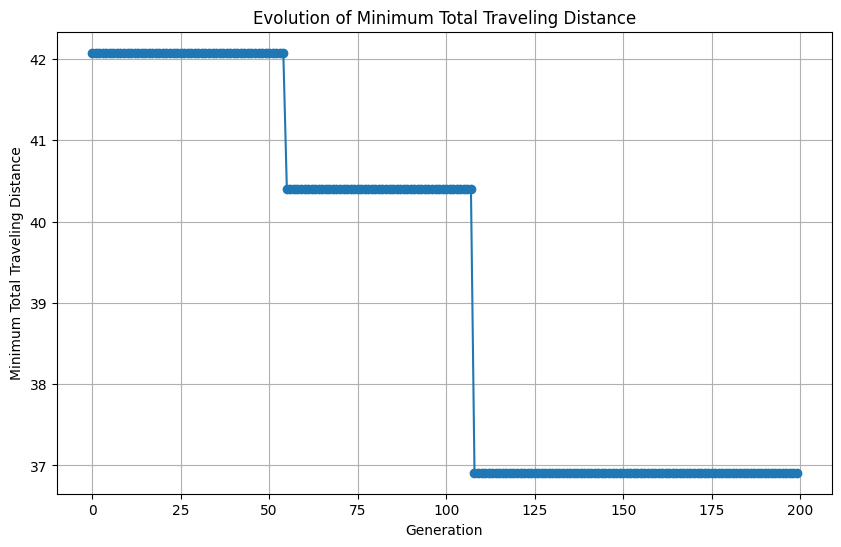

In [9]:
# Define the number of cities and coordinates for dataset 1
num_cities_dataset1 = 14

# Dataset 1
# Extract node coordinates from the loaded dataset
node_coords = dataset1.node_coords
#dataset1 = generate_problem_instance(num_cities_dataset1)
distances_dataset1 = compute_distances(node_coords)

# Define parameter combinations for dataset 1
parameter_combinations_dataset1 = [
    {'population_size': 100, 'mutation_rate': 0.01, 'max_generations': 100},
    {'population_size': 200, 'mutation_rate': 0.01, 'max_generations': 150},
    {'population_size': 150, 'mutation_rate': 0.02, 'max_generations': 100},
    {'population_size': 250, 'mutation_rate': 0.02, 'max_generations': 150},
    {'population_size': 100, 'mutation_rate': 0.03, 'max_generations': 150},
    {'population_size': 200, 'mutation_rate': 0.03, 'max_generations': 200}
]

results_dataset1 = []

# Iterate over parameter combinations and execute genetic algorithm
for params in parameter_combinations_dataset1:
    population_size = params['population_size']
    mutation_rate = params['mutation_rate']
    max_generations = params['max_generations']
    
    best_solution_dataset1, best_distances_dataset1 = genetic_algorithm(distances_dataset1, population_size, mutation_rate, max_generations)
    results_dataset1.append({'parameters': params, 'best_solution': best_solution_dataset1, 'best_distances': best_distances_dataset1})

for i, result in enumerate(results_dataset1):
    print(f"Parameters Set {i + 1}:")
    print("Population Size:", result['parameters']['population_size'])
    print("Mutation Rate:", result['parameters']['mutation_rate'])
    print("Max Generations:", result['parameters']['max_generations'])
    print("Best Solution:", result['best_solution'])
    print("Best Distance:", result['best_distances'])
    print()

import matplotlib.pyplot as plt

# Plot the evolution of the minimum total traveling distance
plt.figure(figsize=(10, 6))
plt.plot(best_distances_dataset1, marker='o', linestyle='-')
plt.title("Evolution of Minimum Total Traveling Distance")
plt.xlabel("Generation")
plt.ylabel("Minimum Total Traveling Distance")
plt.grid(True)
plt.show()


Problem with 10-30 (29) city problem

Parameters Set 1:
Population Size: 100
Mutation Rate: 0.01
Max Generations: 100
Best Solution: [10, 13, 21, 16, 9, 0, 4, 12, 6, 18, 24, 7, 27, 25, 26, 20, 3, 17, 22, 2, 28, 5, 11, 8, 1, 23, 15, 14, 19]
Best Distance: [21948.907227245032, 21948.907227245032, 21948.907227245032, 21365.91615586549, 21365.91615586549, 21365.91615586549, 20622.257032889935, 20622.257032889935, 20622.257032889935, 20622.257032889935, 20622.257032889935, 20622.257032889935, 20622.257032889935, 20622.257032889935, 20622.257032889935, 20622.257032889935, 20622.257032889935, 20622.257032889935, 20622.257032889935, 20622.257032889935, 20622.257032889935, 20622.257032889935, 20622.257032889935, 20622.257032889935, 20622.257032889935, 20622.257032889935, 20622.257032889935, 20622.257032889935, 20622.257032889935, 20622.257032889935, 20622.257032889935, 20622.257032889935, 20622.257032889935, 20622.257032889935, 20622.257032889935, 20622.257032889935, 20622.257032889935, 20622.257032889935, 20199.325532094128, 20199

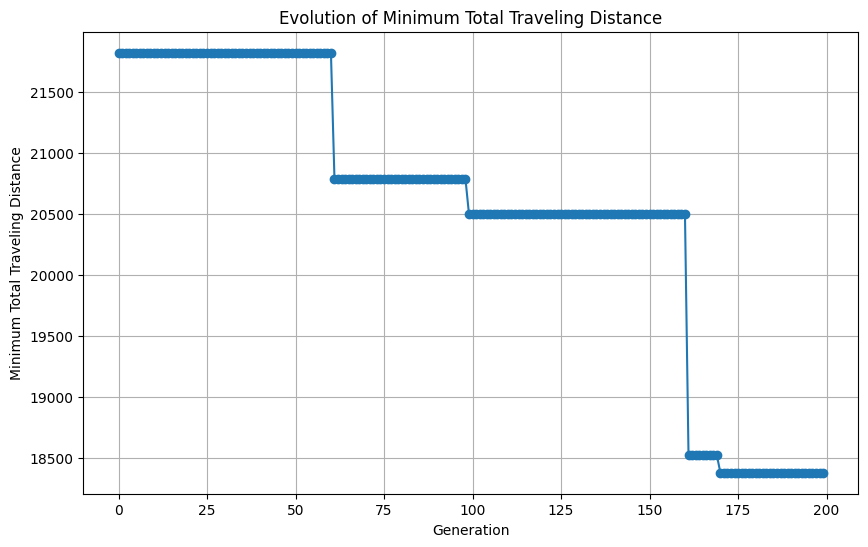

In [14]:
# Define the number of cities and coordinates for dataset 2
num_cities_dataset2 = 29

# Dataset 2
# Extract node coordinates from the loaded dataset
display_data_section = dataset2.display_data
# Convert display_data_section values to a dictionary
node_coords = {int(node): (float(coords[0]), float(coords[1])) for node, coords in display_data_section.items()}

distances_dataset2 = compute_distances(node_coords)

# Define parameter combinations for dataset 2
parameter_combinations_dataset = [
    {'population_size': 100, 'mutation_rate': 0.01, 'max_generations': 100},
    {'population_size': 200, 'mutation_rate': 0.01, 'max_generations': 150},
    {'population_size': 150, 'mutation_rate': 0.02, 'max_generations': 100},
    {'population_size': 250, 'mutation_rate': 0.02, 'max_generations': 150},
    {'population_size': 100, 'mutation_rate': 0.03, 'max_generations': 150},
    {'population_size': 200, 'mutation_rate': 0.03, 'max_generations': 200}
]

results_dataset = []

# Iterate over parameter combinations and execute genetic algorithm
for params in parameter_combinations_dataset:
    population_size = params['population_size']
    mutation_rate = params['mutation_rate']
    max_generations = params['max_generations']
    
    best_solution_dataset, best_distances_dataset = genetic_algorithm(distances_dataset2, population_size, mutation_rate, max_generations)
    results_dataset.append({'parameters': params, 'best_solution': best_solution_dataset, 'best_distances': best_distances_dataset})

for i, result in enumerate(results_dataset):
    print(f"Parameters Set {i + 1}:")
    print("Population Size:", result['parameters']['population_size'])
    print("Mutation Rate:", result['parameters']['mutation_rate'])
    print("Max Generations:", result['parameters']['max_generations'])
    print("Best Solution:", result['best_solution'])
    print("Best Distance:", result['best_distances'])
    print()

import matplotlib.pyplot as plt

# Plot the evolution of the minimum total traveling distance
plt.figure(figsize=(10, 6))
plt.plot(best_distances_dataset, marker='o', linestyle='-')
plt.title("Evolution of Minimum Total Traveling Distance")
plt.xlabel("Generation")
plt.ylabel("Minimum Total Traveling Distance")
plt.grid(True)
plt.show()


Problem with 101-city problem

Parameters Set 1:
Population Size: 100
Mutation Rate: 0.01
Max Generations: 100
Best Solution: [30, 33, 92, 45, 27, 77, 1, 41, 96, 83, 99, 43, 93, 20, 55, 98, 6, 59, 88, 42, 40, 78, 25, 73, 3, 14, 10, 100, 49, 24, 28, 31, 65, 53, 90, 74, 63, 61, 19, 80, 48, 29, 91, 5, 47, 17, 35, 13, 84, 36, 0, 71, 21, 72, 60, 15, 81, 44, 82, 8, 23, 38, 75, 26, 69, 51, 86, 37, 94, 62, 68, 12, 85, 22, 57, 2, 87, 46, 79, 34, 4, 95, 54, 66, 89, 76, 7, 18, 39, 11, 16, 97, 50, 64, 52, 70, 56, 32, 9, 58, 67]
Best Distance: [3116.71109262187, 3091.880601975961, 3091.880601975961, 3091.880601975961, 3091.880601975961, 3091.880601975961, 3091.880601975961, 3091.880601975961, 3091.880601975961, 3091.880601975961, 3091.880601975961, 3091.880601975961, 3091.880601975961, 3091.880601975961, 3091.880601975961, 3091.880601975961, 3091.880601975961, 3091.880601975961, 3091.880601975961, 3091.880601975961, 3091.880601975961, 3091.880601975961, 3087.914834955717, 3087.914834955717, 3087.914834955717, 3087.914834955717, 

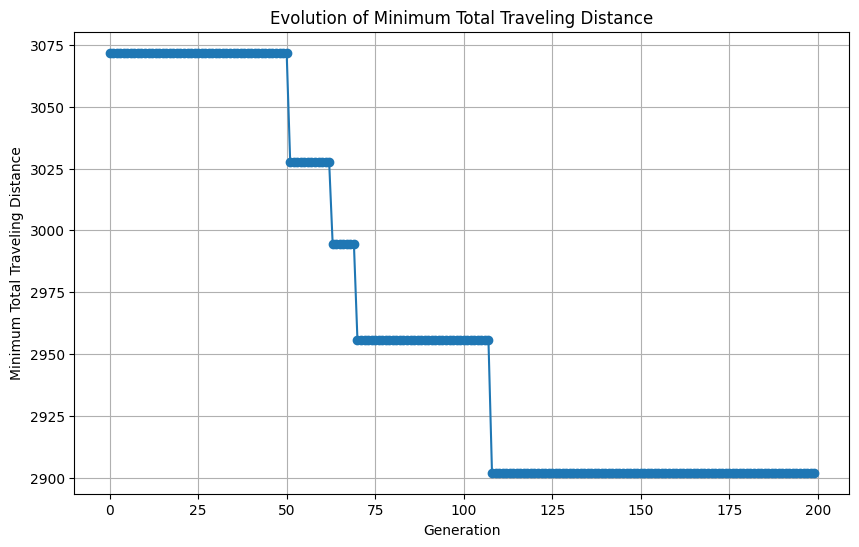

In [15]:
# Define the number of cities and coordinates for dataset 3
num_cities_dataset3 = 101

# Dataset 3
# Extract node coordinates from the loaded dataset
node_coords = dataset3.node_coords
distances_dataset3 = compute_distances(node_coords)

# Define parameter combinations for dataset 3
parameter_combinations_dataset = [
    {'population_size': 100, 'mutation_rate': 0.01, 'max_generations': 100},
    {'population_size': 200, 'mutation_rate': 0.01, 'max_generations': 150},
    {'population_size': 150, 'mutation_rate': 0.02, 'max_generations': 100},
    {'population_size': 250, 'mutation_rate': 0.02, 'max_generations': 150},
    {'population_size': 100, 'mutation_rate': 0.03, 'max_generations': 150},
    {'population_size': 200, 'mutation_rate': 0.03, 'max_generations': 200}
]

results_dataset = []

# Iterate over parameter combinations and execute genetic algorithm
for params in parameter_combinations_dataset:
    population_size = params['population_size']
    mutation_rate = params['mutation_rate']
    max_generations = params['max_generations']
    
    best_solution_dataset, best_distances_dataset = genetic_algorithm(distances_dataset3, population_size, mutation_rate, max_generations)
    results_dataset.append({'parameters': params, 'best_solution': best_solution_dataset, 'best_distances': best_distances_dataset})

for i, result in enumerate(results_dataset):
    print(f"Parameters Set {i + 1}:")
    print("Population Size:", result['parameters']['population_size'])
    print("Mutation Rate:", result['parameters']['mutation_rate'])
    print("Max Generations:", result['parameters']['max_generations'])
    print("Best Solution:", result['best_solution'])
    print("Best Distance:", result['best_distances'])
    print()

import matplotlib.pyplot as plt

# Plot the evolution of the minimum total traveling distance
plt.figure(figsize=(10, 6))
plt.plot(best_distances_dataset, marker='o', linestyle='-')
plt.title("Evolution of Minimum Total Traveling Distance")
plt.xlabel("Generation")
plt.ylabel("Minimum Total Traveling Distance")
plt.grid(True)
plt.show()

Problem with 1173-city problems

Parameters Set 1:
Population Size: 100
Mutation Rate: 0.01
Max Generations: 100
Best Solution: [539, 1012, 1124, 12, 669, 814, 681, 379, 144, 434, 701, 920, 421, 591, 106, 975, 613, 267, 849, 948, 7, 185, 906, 499, 205, 22, 18, 328, 570, 1004, 974, 844, 710, 1025, 698, 155, 87, 687, 1141, 1150, 985, 268, 142, 212, 493, 236, 30, 1169, 540, 680, 289, 572, 363, 947, 313, 324, 89, 369, 628, 919, 895, 697, 57, 465, 1088, 352, 1165, 1084, 256, 103, 1085, 828, 1116, 935, 599, 835, 1119, 13, 305, 608, 1016, 749, 1162, 153, 50, 529, 183, 479, 733, 630, 654, 395, 942, 727, 182, 1009, 237, 318, 924, 1001, 311, 848, 278, 412, 1067, 1149, 6, 171, 526, 303, 189, 470, 9, 116, 988, 1127, 707, 26, 62, 74, 716, 990, 1154, 1058, 575, 350, 979, 64, 538, 123, 774, 845, 140, 571, 1063, 1144, 247, 531, 407, 933, 73, 158, 376, 705, 340, 194, 224, 119, 1046, 893, 562, 220, 409, 903, 362, 729, 504, 785, 266, 279, 128, 241, 84, 206, 432, 32, 535, 728, 16, 624, 1098, 102, 619, 676, 826, 632, 497, 650, 1017, 921, 

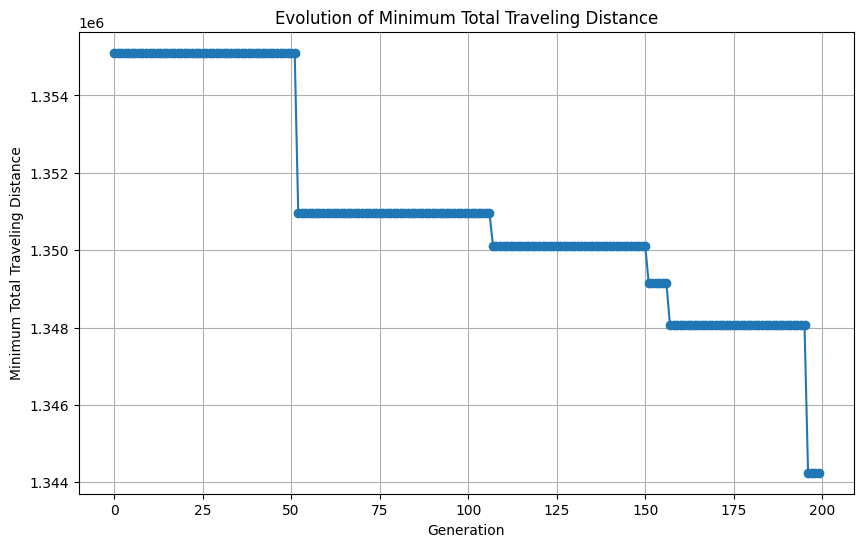

In [16]:
# Define the number of cities and coordinates for dataset 4
num_cities_dataset = 1173

# Dataset 4
# Extract node coordinates from the loaded dataset
node_coords = dataset4.node_coords
distances_dataset4 = compute_distances(node_coords)

# Define parameter combinations for dataset 4
parameter_combinations_dataset = [
    {'population_size': 100, 'mutation_rate': 0.01, 'max_generations': 100},
    {'population_size': 200, 'mutation_rate': 0.01, 'max_generations': 150},
    {'population_size': 150, 'mutation_rate': 0.02, 'max_generations': 100},
    {'population_size': 250, 'mutation_rate': 0.02, 'max_generations': 150},
    {'population_size': 100, 'mutation_rate': 0.03, 'max_generations': 150},
    {'population_size': 200, 'mutation_rate': 0.03, 'max_generations': 200}
]

results_dataset = []

# Iterate over parameter combinations and execute genetic algorithm
for params in parameter_combinations_dataset:
    population_size = params['population_size']
    mutation_rate = params['mutation_rate']
    max_generations = params['max_generations']
    
    best_solution_dataset, best_distances_dataset = genetic_algorithm(distances_dataset4, population_size, mutation_rate, max_generations)
    results_dataset.append({'parameters': params, 'best_solution': best_solution_dataset, 'best_distances': best_distances_dataset})

for i, result in enumerate(results_dataset):
    print(f"Parameters Set {i + 1}:")
    print("Population Size:", result['parameters']['population_size'])
    print("Mutation Rate:", result['parameters']['mutation_rate'])
    print("Max Generations:", result['parameters']['max_generations'])
    print("Best Solution:", result['best_solution'])
    print("Best Distance:", result['best_distances'])
    print()

import matplotlib.pyplot as plt

# Plot the evolution of the minimum total traveling distance
plt.figure(figsize=(10, 6))
plt.plot(best_distances_dataset, marker='o', linestyle='-')
plt.title("Evolution of Minimum Total Traveling Distance")
plt.xlabel("Generation")
plt.ylabel("Minimum Total Traveling Distance")
plt.grid(True)
plt.show()


Problem with 3795-city problems

Parameters Set 1:
Population Size: 100
Mutation Rate: 0.01
Max Generations: 100
Best Solution: [2262, 1154, 174, 601, 2960, 1200, 2419, 3030, 2932, 186, 3264, 1225, 2296, 91, 176, 2579, 2685, 3044, 3709, 2395, 3374, 2924, 2175, 3605, 104, 3665, 2362, 1267, 262, 1448, 1515, 3163, 1587, 1096, 1104, 3334, 333, 3093, 2114, 3013, 1997, 3069, 1886, 707, 1026, 2480, 1523, 2735, 2675, 1800, 3381, 3485, 1449, 1499, 3461, 3688, 3247, 2126, 1093, 3051, 3647, 1425, 122, 517, 3043, 274, 3455, 3037, 904, 2231, 51, 1830, 2079, 2057, 3463, 3213, 2581, 1280, 953, 344, 3521, 40, 1358, 212, 1068, 1529, 236, 3708, 71, 3032, 216, 2507, 2908, 1924, 1137, 604, 1376, 204, 1532, 370, 108, 3652, 1458, 1583, 3281, 3200, 141, 972, 2734, 1884, 301, 590, 2799, 638, 1298, 210, 2142, 287, 2723, 1198, 3177, 2597, 2880, 1936, 605, 1438, 3170, 3092, 1580, 2045, 78, 1970, 708, 1082, 844, 2001, 1674, 2042, 2191, 935, 3651, 755, 337, 1125, 2822, 1408, 1327, 3026, 2587, 2363, 3673, 773, 2866, 683, 3417, 3215, 3437, 3225, 44

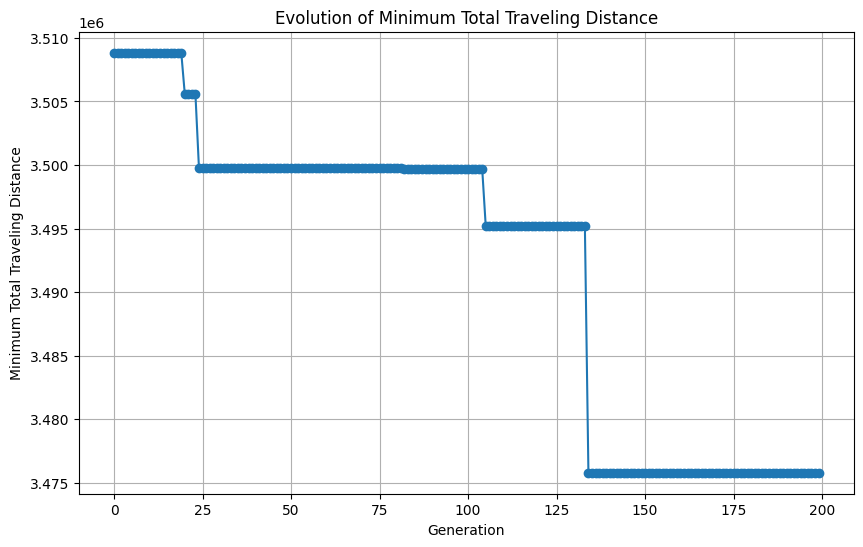

In [17]:
# Define the number of cities and coordinates for dataset 5
num_cities_dataset = 3795

# Dataset 5
# Extract node coordinates from the loaded dataset
node_coords = dataset5.node_coords
distances_dataset5 = compute_distances(node_coords)

# Define parameter combinations for dataset 5
parameter_combinations_dataset = [
    {'population_size': 100, 'mutation_rate': 0.01, 'max_generations': 100},
    {'population_size': 200, 'mutation_rate': 0.01, 'max_generations': 150},
    {'population_size': 150, 'mutation_rate': 0.02, 'max_generations': 100},
    {'population_size': 250, 'mutation_rate': 0.02, 'max_generations': 150},
    {'population_size': 100, 'mutation_rate': 0.03, 'max_generations': 150},
    {'population_size': 200, 'mutation_rate': 0.03, 'max_generations': 200}
]

results_dataset = []

# Iterate over parameter combinations and execute genetic algorithm
for params in parameter_combinations_dataset:
    population_size = params['population_size']
    mutation_rate = params['mutation_rate']
    max_generations = params['max_generations']
    
    best_solution_dataset, best_distances_dataset = genetic_algorithm(distances_dataset5, population_size, mutation_rate, max_generations)
    results_dataset.append({'parameters': params, 'best_solution': best_solution_dataset, 'best_distances': best_distances_dataset})

for i, result in enumerate(results_dataset):
    print(f"Parameters Set {i + 1}:")
    print("Population Size:", result['parameters']['population_size'])
    print("Mutation Rate:", result['parameters']['mutation_rate'])
    print("Max Generations:", result['parameters']['max_generations'])
    print("Best Solution:", result['best_solution'])
    print("Best Distance:", result['best_distances'])
    print()

import matplotlib.pyplot as plt

# Plot the evolution of the minimum total traveling distance
plt.figure(figsize=(10, 6))
plt.plot(best_distances_dataset, marker='o', linestyle='-')
plt.title("Evolution of Minimum Total Traveling Distance")
plt.xlabel("Generation")
plt.ylabel("Minimum Total Traveling Distance")
plt.grid(True)
plt.show()